In [19]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models 
import matplotlib.pyplot as plt
import pandas as pd

In [20]:
(x_train, y_train), (x_test,y_test) = datasets.cifar10.load_data()

In [21]:
x_train.shape

(50000, 32, 32, 3)

In [22]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [23]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [24]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [25]:
def plot_sample(x,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

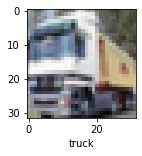

In [26]:
plot_sample(x_train, y_train,1)

**Normalize**

In [27]:
x_train = x_train/255
x_test = x_test/255

**Create ANN Models**

In [28]:
ann = models.Sequential([
    layers.Flatten(input_shape=[32,32,3]),
    layers.Dense(3000,activation="relu"), #Layers and Activation Functions
    layers.Dense(1000,activation="relu"),
    layers.Dense(10,activation="sigmoid")
])

ann.compile(optimizer="SGD",loss="sparse_categorical_crossentropy",metrics=['accuracy'])
ann.fit(x_train, y_train, epochs=6)

Epoch 1/6
1563/1563 [==============================] - 64s 41ms/step - loss: 1.9335 - accuracy: 0.3034
Epoch 2/6
1563/1563 [==============================] - 61s 39ms/step - loss: 1.6462 - accuracy: 0.4220
Epoch 3/6
1563/1563 [==============================] - 69s 44ms/step - loss: 1.5495 - accuracy: 0.4493
Epoch 4/6
1563/1563 [==============================] - 69s 44ms/step - loss: 1.4938 - accuracy: 0.4766
Epoch 5/6
1563/1563 [==============================] - 73s 46ms/step - loss: 1.4390 - accuracy: 0.4920
Epoch 6/6
1563/1563 [==============================] - 70s 45ms/step - loss: 1.3936 - accuracy: 0.5084


In [29]:
ann.evaluate(x_test, y_test)

313/313 [==============================] - 5s 14ms/step - loss: 1.5356 - accuracy: 0.4598


[1.5356156826019287, 0.45980000495910645]

In [30]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

y_pred = ann.predict(x_test)
y_pred_class = [np.argmax(element) for element in y_pred]

print("Classification Report :\n", classification_report(y_test,y_pred_class))

Classification Report :
               precision    recall  f1-score   support

           0       0.37      0.67      0.48      1000
           1       0.46      0.76      0.57      1000
           2       0.43      0.20      0.27      1000
           3       0.44      0.23      0.31      1000
           4       0.38      0.52      0.44      1000
           5       0.56      0.21      0.31      1000
           6       0.51      0.59      0.54      1000
           7       0.64      0.45      0.53      1000
           8       0.47      0.74      0.57      1000
           9       0.68      0.22      0.34      1000

    accuracy                           0.46     10000
   macro avg       0.49      0.46      0.44     10000
weighted avg       0.49      0.46      0.44     10000



In [31]:
cnn = models.Sequential([
    #cnn
    layers.Conv2D(filters=32, kernel_size=(3,3), activation="relu", input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=32, kernel_size=(3,3), activation="relu", input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=32, kernel_size=(3,3), activation="relu", input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    #dense
    layers.Flatten(),
    layers.Dense(64,activation="relu"),
    layers.Dense(10,activation="softmax")
])

In [32]:
cnn.compile(optimizer='adam',loss="sparse_categorical_crossentropy",metrics=['accuracy'])

In [33]:
cnn.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 44s 28ms/step - loss: 1.8091 - accuracy: 0.3272
Epoch 2/10
1563/1563 [==============================] - 40s 26ms/step - loss: 1.3133 - accuracy: 0.5276
Epoch 3/10
1563/1563 [==============================] - 34s 22ms/step - loss: 1.1664 - accuracy: 0.5837
Epoch 4/10
1563/1563 [==============================] - 32s 20ms/step - loss: 1.0737 - accuracy: 0.6206
Epoch 5/10
1563/1563 [==============================] - 30s 19ms/step - loss: 0.9964 - accuracy: 0.6469
Epoch 6/10
1563/1563 [==============================] - 31s 20ms/step - loss: 0.9478 - accuracy: 0.6663
Epoch 7/10
1563/1563 [==============================] - 30s 19ms/step - loss: 0.9057 - accuracy: 0.6829
Epoch 8/10
1563/1563 [==============================] - 31s 20ms/step - loss: 0.8684 - accuracy: 0.6939
Epoch 9/10
1563/1563 [==============================] - 33s 21ms/step - loss: 0.8317 - accuracy: 0.7072
Epoch 10/10
1563/1563 [==============================] - 31s 20m

In [ ]:
cnn.evaluate(x_test,y_test)

In [54]:
y_pred = cnn.predict(x_test)

In [55]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:6]

[3, 1, 8, 0, 4, 6]

In [56]:
y_test = y_test.reshape(-1,)
y_test[:6]

array([3, 8, 8, 0, 6, 6], dtype=uint8)

In [63]:
i = 0
for x in y_classes:
    if x == y_test[i]:
        i+= 1
    else:
        print(i)
        break 

1


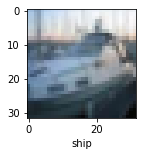

In [64]:
plot_sample(x_test,y_classes,2)

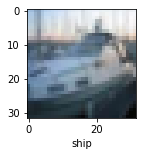

In [65]:
plot_sample(x_test,y_test,2)